# Import environment

In [1]:
import os
from datetime import datetime
import pathlib


if 'main_dir' in globals():
    os.chdir(main_dir)

import pandas as pd
from utils.load_config import (
    load_exp_config, 
    get_value_from_fields, 
    )

from utils.load_data import (
    get_df_from_datetime_range
    )

from utils.plotting import (
    STICK_SIZE,
    plot_cost_ic_learning_curve_mod,
    plot_cost_median_top_5_learning_curve,
    plot_accum_cost_ic,
    plot_accum_cost_median,
    plot_chosen_best_checkpoint,
    plot_distance_goal_hist,
    plot_distance_goal_comhist
    )

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# plt.style.use("tableau-colorblind10")
plt.style.use("seaborn-v0_8-whitegrid")

from regelum.objective import RunningObjective
from regelum.model import ModelQuadLin
import numpy as np


if os.getcwd().endswith("notebooks"):
    main_dir = os.getcwd()
    os.chdir("..")

%matplotlib inline

In [2]:
try:
    from src.objective import ThreeWheeledRobotCostWithSpot
except:
    from src.objective import ThreeWheeledRobotCostWithSpot

# Setup Objective function for re-calculation

In [3]:

objective_function = RunningObjective(ModelQuadLin(
    weights= [2, 10, 0, 0, 0],
    quad_matrix_type="diagonal",
    is_with_linear_terms=False,
))

objective_function = ThreeWheeledRobotCostWithSpot(
    quadratic_model=ModelQuadLin(
        weights= [100, 100, 0, 0, 0],
        quad_matrix_type="diagonal",
        is_with_linear_terms=False),
        spot_gain=100,
        spot_x_center=-0.5,
        spot_y_center=-0.5,
        spot_std=0.2,
    )


def get_sampling_time(exp_path):
    config = load_exp_config(exp_path)

    sampling_time = config['scenario']['sampling_time']
    if "$" in sampling_time:
        correct_fields = sampling_time.strip("\{\}$").split(".")
        sampling_time = get_value_from_fields(config, correct_fields)

    return sampling_time

    

In [4]:

observation = np.array([[1, 1, 0.01]])
actions = np.array([[1, 1]])
objective_function(observation, actions)

200.0

## Plot objective

In [5]:
def get_cost_map(x_lim, y_lim):
    X = np.arange(x_lim[0], x_lim[1], 0.01)
    Y = np.arange(y_lim[0], y_lim[1], 0.01)

    X, Y = np.meshgrid(X, Y)
    Z = []
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z.append(objective_function(observation=np.array([[X[i, j], Y[i, j], 0]]),
                                        action=np.array([[0, 0]])))

    Z = np.array(Z).reshape((X.shape[0], X.shape[1]))
    
    return X, Y, Z
X, Y, Z = get_cost_map([-1.7, 0.3], [-1.7, 0.3])

# Plotting

## Get data from experiments

In [6]:
DECAY_RATE = 1

# New PPO with R1 = [100, 100, 1, 0, 0]
start_datetime_str = "2024-08-27 20-05-21"
end_datetime_str = "2024-08-28 22-25-19"
ppo_df = get_df_from_datetime_range(start_datetime_str, 
                                    end_datetime_str, 
                                    objective_function=objective_function,
                                    decay_rate=DECAY_RATE)

# start_datetime_str = "2024-08-29 00-52-27"
start_datetime_str = "2024-08-29 10-06-36"
end_datetime_str = "2024-08-29 16-00-05"
_calf_df_1 = get_df_from_datetime_range(start_datetime_str, 
                                        end_datetime_str, 
                                        objective_function=objective_function,
                                        decay_rate=DECAY_RATE)

start_datetime_str = "2024-08-30 10-58-48"
end_datetime_str = "2024-08-30 13-30-59"
_calf_df_2 = get_df_from_datetime_range(start_datetime_str, 
                                        end_datetime_str, 
                                        objective_function=objective_function,
                                        decay_rate=DECAY_RATE)

calf_df = pd.concat([_calf_df_1, _calf_df_2])
calf_df.head()

,time,running_objective,current_value,episode_id,iteration_id,velocity [m/s],angular velocity [rad/s],x [m],y [m],angle [rad],absolute_path,objective_value,accumulative_objective,experiment_path
0,0.000,21.063771,210.637708,1,1,-0.22,-2.840000,-1.000000,-1.000000,3.141593,/home/robosrv/huyhoang/regelum-playground/rege...,200.768103,20.076810,/home/robosrv/huyhoang/regelum-playground/rege...
1,0.104,41.134216,200.704455,1,1,0.22,0.003379,-0.999756,-0.999909,-0.003556,/home/robosrv/huyhoang/regelum-playground/rege...,200.704439,40.147254,/home/robosrv/huyhoang/regelum-playground/rege...
2,0.252,61.266324,201.321074,1,1,0.22,0.060461,-1.002961,-0.999912,-0.067887,/home/robosrv/huyhoang/regelum-playground/rege...,201.316462,60.278900,/home/robosrv/huyhoang/regelum-playground/rege...
3,0.352,81.517495,202.511709,1,1,0.22,0.394074,-1.009933,-0.998942,-0.200139,/home/robosrv/huyhoang/regelum-playground/rege...,202.471652,80.526066,/home/robosrv/huyhoang/regelum-playground/rege...
4,0.456,101.789015,202.715200,1,1,0.22,0.528888,-1.011071,-0.998673,-0.274070,/home/robosrv/huyhoang/regelum-playground/rege...,202.640093,100.790075,/home/robosrv/huyhoang/regelum-playground/rege...


In [7]:
start_datetime_str = "2024-08-29 16-29-17"
end_datetime_str = "2024-08-30 06-07-04"
sarsa_m_df = get_df_from_datetime_range(start_datetime_str, 
                                        end_datetime_str, 
                                        objective_function=objective_function,
                                        decay_rate=DECAY_RATE)

In [8]:
# MPC N=10 40s seed 8
start_datetime_str = "2024-08-30 08-43-58"
end_datetime_str = "2024-08-30 08-43-58"
mpc_10_df = get_df_from_datetime_range(start_datetime_str, 
                                       end_datetime_str, 
                                       objective_function=objective_function,
                                       decay_rate=DECAY_RATE)

# MPC N=15 40s seed 8
start_datetime_str = "2024-08-30 08-42-55"
end_datetime_str = "2024-08-30 08-42-55"
mpc_15_df = get_df_from_datetime_range(start_datetime_str, 
                                       end_datetime_str, 
                                       objective_function=objective_function,
                                       decay_rate=DECAY_RATE)

# MPC N=25 40s seed 8
start_datetime_str = "2024-08-30 08-40-59"
end_datetime_str = "2024-08-30 08-40-59"
mpc_25_df = get_df_from_datetime_range(start_datetime_str, 
                                       end_datetime_str, 
                                       objective_function=objective_function,
                                       decay_rate=DECAY_RATE)

In [9]:
start_datetime_str = "2024-09-14 18-44-59"
end_datetime_str = "2024-09-14 18-44-59"
nominal_df = get_df_from_datetime_range(start_datetime_str, 
                                        end_datetime_str, 
                                        objective_function=objective_function,
                                        decay_rate=DECAY_RATE)

In [10]:
ppo_df.iloc[-1].absolute_path

'/home/robosrv/huyhoang/regelum-playground/regelum_data/outputs/2024-08-28/10-42-37/0/.callbacks/HistoricalDataCallback/observations_actions_it_00100.h5'

## Define colors

In [11]:
color_selection = {
    "PPO": ["plum", "tab:purple"],
    "MPC10": ["tab:orange"],
    "MPC15": ["tab:purple"],
    "MPC25": ["tab:olive"],
    "CALF": ["lightblue", "tab:blue"],
    "SARSA-m": ["lightgreen", 'tab:green'],
    "Nominal": ["tab:red"],
}

## Plot learning curves

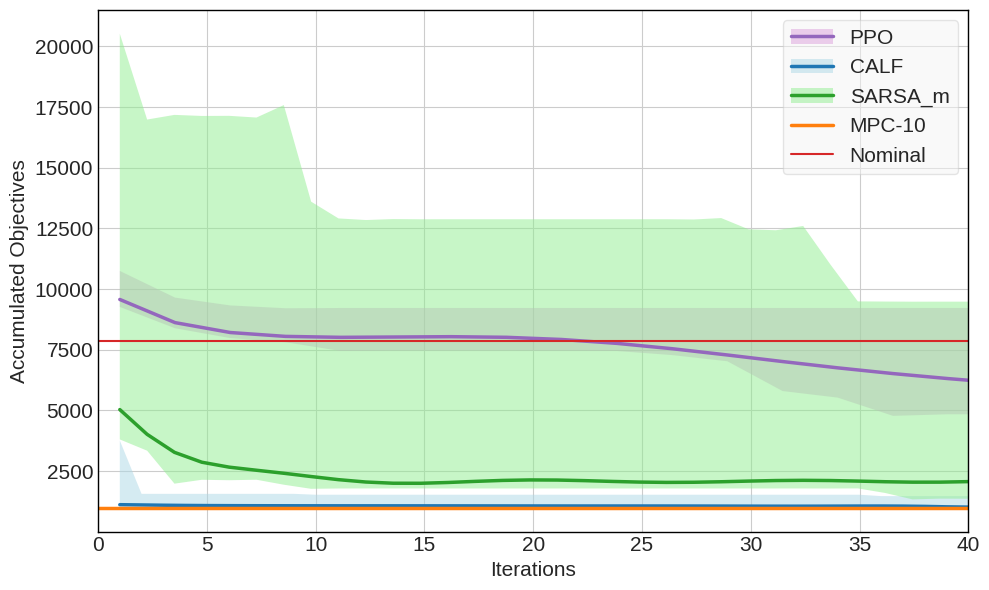

In [31]:
# %matplotlib inline
plt.clf()

MEDIUM_SIZE = 10
BIG_SIZE = 15
plt.rc('axes', titlesize=BIG_SIZE)
plt.rc('axes', labelsize=BIG_SIZE)
plt.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIG_SIZE)

plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')
plt.style.use("seaborn-v0_8-whitegrid")

p1 = plot_cost_ic_learning_curve_mod(ppo_df, ax, color=color_selection["PPO"][0])
p2 = plot_cost_median_top_5_learning_curve(ppo_df, ax, color=color_selection["PPO"][1])

p3 = plot_cost_ic_learning_curve_mod(calf_df, ax, color=color_selection["CALF"][0], use_interpolate=True)
p4 = plot_cost_median_top_5_learning_curve(calf_df, ax, color=color_selection["CALF"][1])

p5_10 = ax.axhline(y=mpc_10_df.accumulative_objective.values[-1], color=color_selection["MPC10"][0], linestyle="solid", lw=2.5)
p6 = ax.axhline(y=nominal_df.accumulative_objective.values[-1], color=color_selection["Nominal"][0], linestyle="solid")

p7 = plot_cost_ic_learning_curve_mod(sarsa_m_df, ax, color=color_selection["SARSA-m"][0])
p8 = plot_cost_median_top_5_learning_curve(sarsa_m_df, ax, color=color_selection["SARSA-m"][1])

legend_info = {
    "PPO": (p1, p2),
    "CALF": (p3, p4),
    "SARSA_m": (p7, p8),
    "MPC-10": p5_10,
    "Nominal": p6,
}

legend = ax.legend(legend_info.values(), 
                   legend_info.keys(),
                   facecolor='whitesmoke', 
                   framealpha=0.5)
legend.set_frame_on(True)

# ax.set_ylim(-0.1, 51000) # overall

# ax.set_ylim(1000, 1200) # CALF zoom in

# ax.set_yscale("log")

ax.set_xlim(0, 40)
plt.tight_layout()
fig.savefig("media/report_learning_curves.svg", 
            facecolor='w',
            bbox_inches = 'tight',
            pad_inches = 0)

## Plot accumulated cost over time

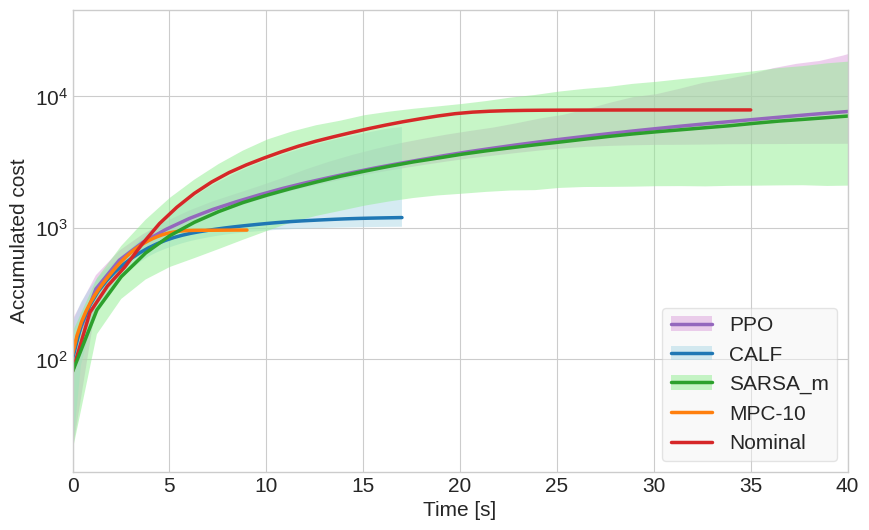

In [13]:
# %matplotlib inline

plt.clf()
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')
# ax.patch.set_facecolor('white')
plt.style.use("seaborn-v0_8-whitegrid")

p1 = plot_accum_cost_ic(ppo_df, ax, color=color_selection["PPO"][0])
p2 = plot_accum_cost_median(ppo_df, ax, color=color_selection["PPO"][1])

p3 = plot_accum_cost_ic(calf_df, ax, color=color_selection["CALF"][0])
p4 = plot_accum_cost_median(calf_df, ax, color=color_selection["CALF"][1])

p5_10 = plot_accum_cost_median(mpc_10_df, ax, color=color_selection["MPC10"][0])
# p5_15 = plot_accum_cost_median(mpc_15_df, ax, color=color_selection["MPC15"][0])
# p5_25 = plot_accum_cost_median(mpc_25_df, ax, color=color_selection["MPC25"][0])

p6 = plot_accum_cost_median(nominal_df, ax, color=color_selection["Nominal"][0])

p7 = plot_accum_cost_ic(sarsa_m_df, ax, 
                        color=color_selection["SARSA-m"][0],
                        is_truncate=False)
p8 = plot_accum_cost_median(sarsa_m_df, ax, 
                            color=color_selection["SARSA-m"][1],
                            is_truncate=False)

legend_info = {
    "PPO": (p1, p2),
    "CALF": (p3, p4),
    "SARSA_m": (p7, p8),
    "MPC-10": p5_10,
    # "MPC-15": p5_15,
    # "MPC-25": p5_25,
    "Nominal": p6,
}

legend = ax.legend(legend_info.values(), 
                   legend_info.keys(),
                   facecolor='whitesmoke', 
                   framealpha=0.5)
legend.set_frame_on(True)

ax.set_yscale("log")
ax.set_xlim(0, 40)

ax.set_ylabel("Accumulated cost")

ax.tick_params(axis='both', labelsize=STICK_SIZE)

fig.savefig("media/report_acc_costs.svg", 
            facecolor="white",
            bbox_inches = 'tight',
            pad_inches = 0)
# plt.show()
# frame

# Plot trajectories

1. Find the best checkpoint of CALF, SARSA_m, PPO
2. Run the best checkpoints with 25 seeds
3. Plot each of them in 1 subplot and with Nominal, 3x MPC

## Find the best CALF

/home/robosrv/huyhoang/regelum-playground/regelum_data/outputs/2024-08-29/12-33-12/0/.callbacks/HistoricalDataCallback/observations_actions_it_00015.h5


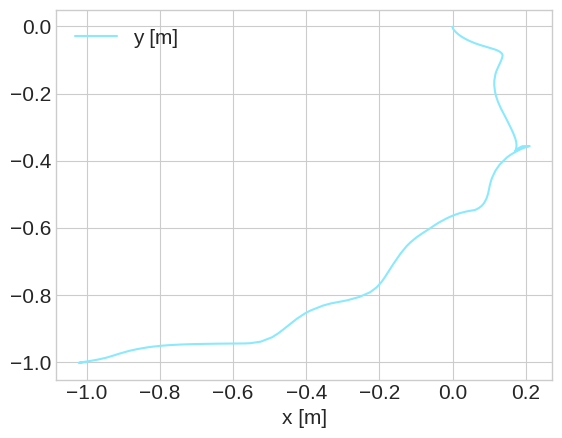

In [14]:
def find_best_exp_from_df(df, radius=0.15):
    df["goal_err"] = df.apply(lambda x: np.linalg.norm([x["x [m]"], x["y [m]"]]), axis=1)

    group_df = df.groupby(["absolute_path"]).last()
    group_df = group_df[group_df.goal_err < radius]

    index = group_df[group_df.accumulative_objective == group_df.accumulative_objective.min()].index
    best_exp = df.query(f"absolute_path == \"{index[0]}\"")

    return best_exp, index[0]

best_calf_df, best_calf_path = find_best_exp_from_df(calf_df)

print(best_calf_path)
best_calf_df.plot(x="x [m]", y="y [m]")

## Find the best of SARSA_m

/home/robosrv/huyhoang/regelum-playground/regelum_data/outputs/2024-08-29/17-12-47/0/.callbacks/HistoricalDataCallback/observations_actions_it_00044.h5


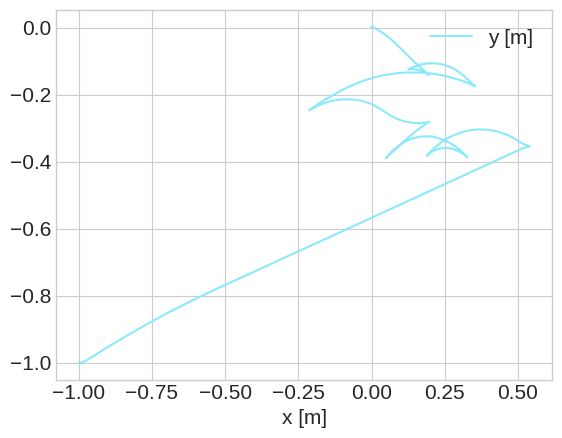

In [15]:
best_sarsa_df, best_sarsa_path = find_best_exp_from_df(sarsa_m_df, radius=0.05)

print(best_sarsa_path)
best_sarsa_df.plot(x="x [m]", y="y [m]")

## Find the best of PPO

/home/robosrv/huyhoang/regelum-playground/regelum_data/outputs/2024-08-27/23-00-48/0/.callbacks/HistoricalDataCallback/observations_actions_it_00053.h5


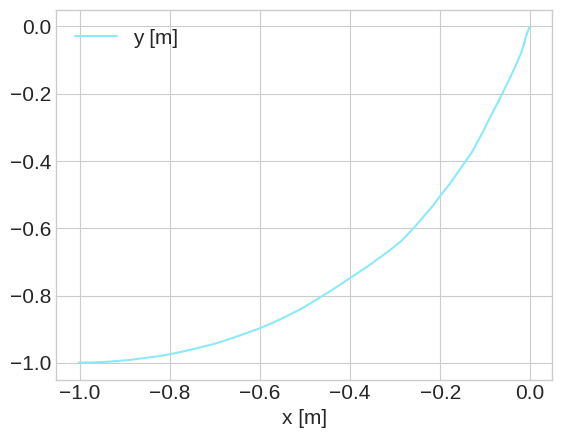

In [16]:
best_ppo_df, best_ppo_path = find_best_exp_from_df(ppo_df, radius=0.01)

print(best_ppo_path)
best_ppo_df.plot(x="x [m]", y="y [m]")

## Load Runs with best checkpoints

In [17]:
# CALF with spot penalty 1e2
start_datetime_str = "2024-08-30 09-19-44"
end_datetime_str = "2024-08-30 09-38-13"
best_calf_df = get_df_from_datetime_range(start_datetime_str, 
                                          end_datetime_str,
                                          objective_function=objective_function, 
                                          decay_rate=DECAY_RATE)

start_datetime_str = "2024-08-30 09-45-55"
end_datetime_str = "2024-08-30 10-09-28"
best_sarsa_df = get_df_from_datetime_range(start_datetime_str, 
                                           end_datetime_str,
                                           objective_function=objective_function,
                                           decay_rate=DECAY_RATE)

start_datetime_str = "2024-08-30 10-24-09"
end_datetime_str = "2024-08-30 10-48-10"
best_ppo_df = get_df_from_datetime_range(start_datetime_str, 
                                         end_datetime_str,
                                         objective_function=objective_function,
                                         decay_rate=DECAY_RATE)


## Plotting trajectories functions

## Plotting trajectories

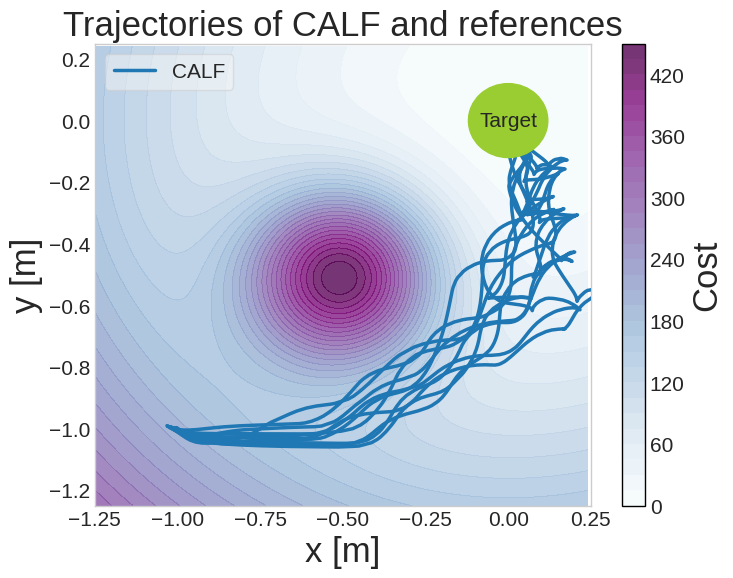

In [18]:
group_df = best_calf_df.groupby(["absolute_path"]).last()
top_10_abs_path = group_df.sort_values(by="accumulative_objective").iloc[:10, :].index
top_10_df = best_calf_df[best_calf_df["absolute_path"].isin(top_10_abs_path)]
plot_chosen_best_checkpoint(top_10_df, "CALF", 
                            color_selection["CALF"][1], 
                            linestyle="solid", 
                            target_r=0.12,
                            get_cost_map_func=get_cost_map)

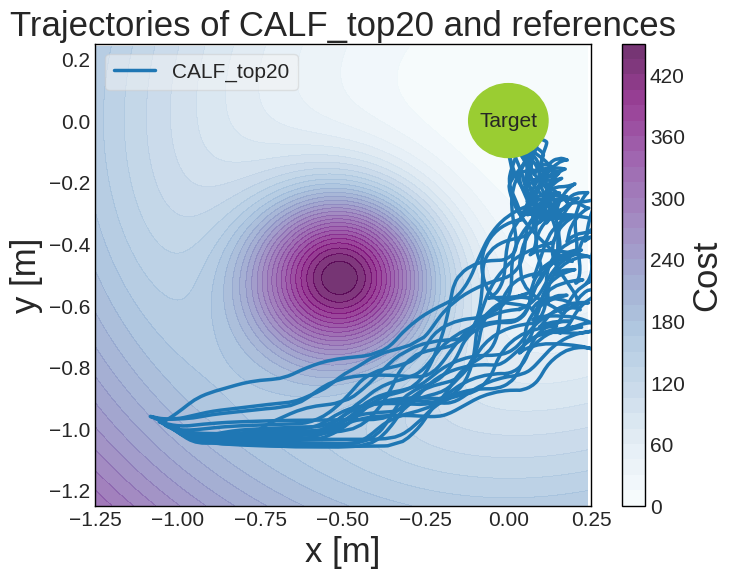

In [19]:
N_TOP=20
group_df = best_calf_df.groupby(["absolute_path"]).last()
top_abs_path = group_df.sort_values(by="accumulative_objective").iloc[:N_TOP, :].index
top_df = best_calf_df[best_calf_df["absolute_path"].isin(top_abs_path)]
plot_chosen_best_checkpoint(top_df, f"CALF_top{N_TOP}", 
                            color_selection["CALF"][1], 
                            linestyle="solid", 
                            target_r=0.12,
                            get_cost_map_func=get_cost_map)

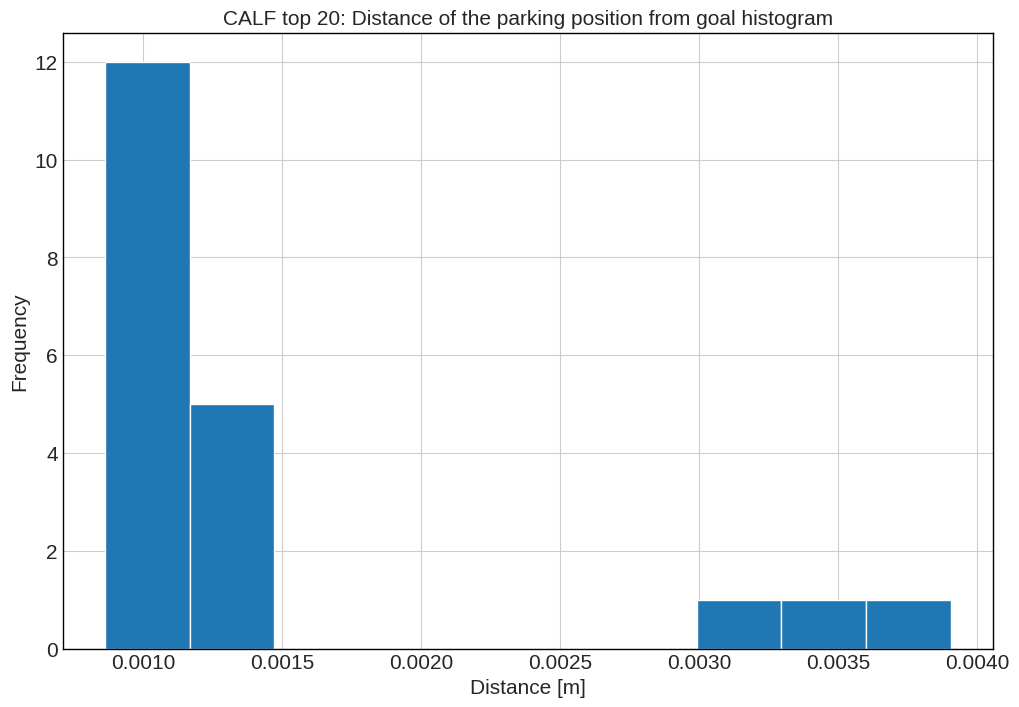

In [20]:
   
plot_distance_goal_hist(best_calf_df, "CALF", color_selection["CALF"][1], n_top=20)

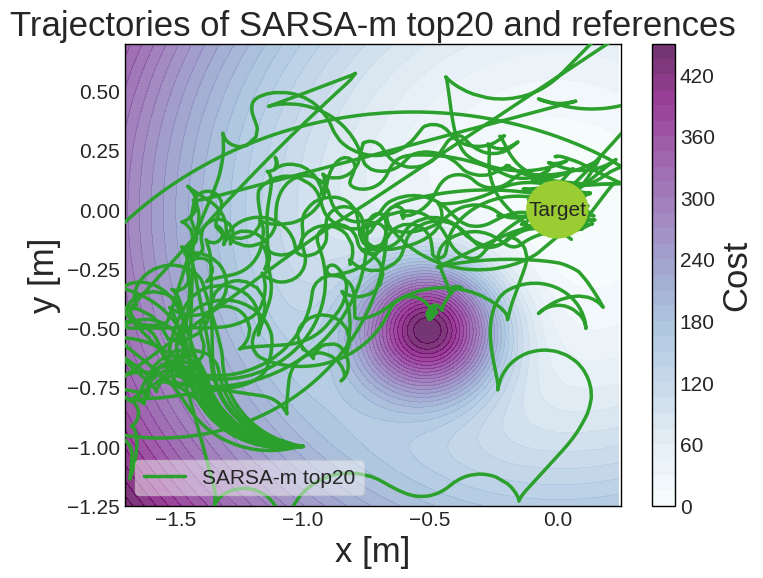

In [22]:
N_TOP=20
best_sarsa_df["goal_err"] = best_sarsa_df.apply(lambda x: np.linalg.norm([x["x [m]"], x["y [m]"]]), axis=1)
group_df = best_sarsa_df.groupby(["absolute_path"]).last()
# top_10_abs_path = group_df.sort_values(by="accumulative_objective").iloc[:10, :].index
top_abs_path = group_df.sort_values(by="goal_err").iloc[:N_TOP, :].index
top_sarsa_df = best_sarsa_df[best_sarsa_df["absolute_path"].isin(top_abs_path)]
plot_chosen_best_checkpoint(top_sarsa_df, 
                            "SARSA-m top20", 
                            color_selection["SARSA-m"][1], 
                            linestyle="solid", 
                            target_r=0.12,
                            x_lim=[-1.7, 0.25],
                            y_lim=[-1.25, 0.7],
                            get_cost_map_func=get_cost_map
                            )


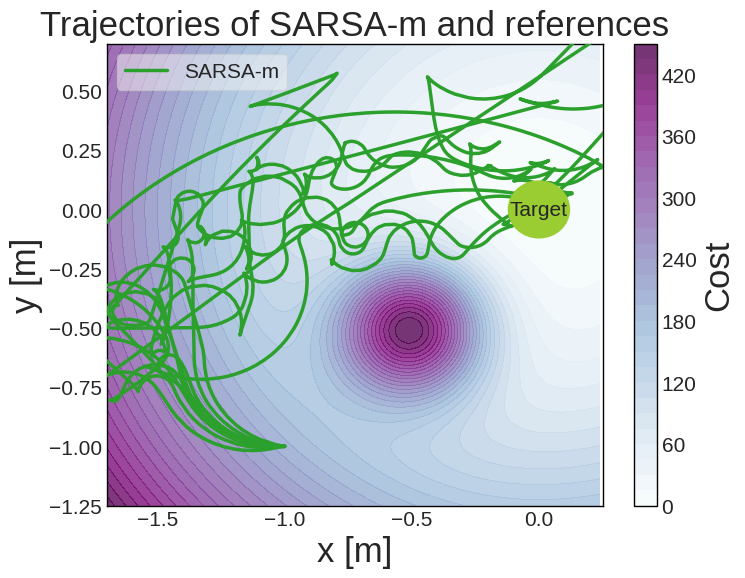

In [23]:
N_TOP=10
best_sarsa_df["goal_err"] = best_sarsa_df.apply(lambda x: np.linalg.norm([x["x [m]"], x["y [m]"]]), axis=1)
group_df = best_sarsa_df.groupby(["absolute_path"]).last()
# top_10_abs_path = group_df.sort_values(by="accumulative_objective").iloc[:10, :].index
top_abs_path = group_df.sort_values(by="goal_err").iloc[:N_TOP, :].index
top_sarsa_df = best_sarsa_df[best_sarsa_df["absolute_path"].isin(top_abs_path)]
plot_chosen_best_checkpoint(top_sarsa_df, 
                            "SARSA-m", 
                            color_selection["SARSA-m"][1], 
                            linestyle="solid", 
                            target_r=0.12,
                            x_lim=[-1.7, 0.25],
                            y_lim=[-1.25, 0.7],
                            get_cost_map_func=get_cost_map
                            )


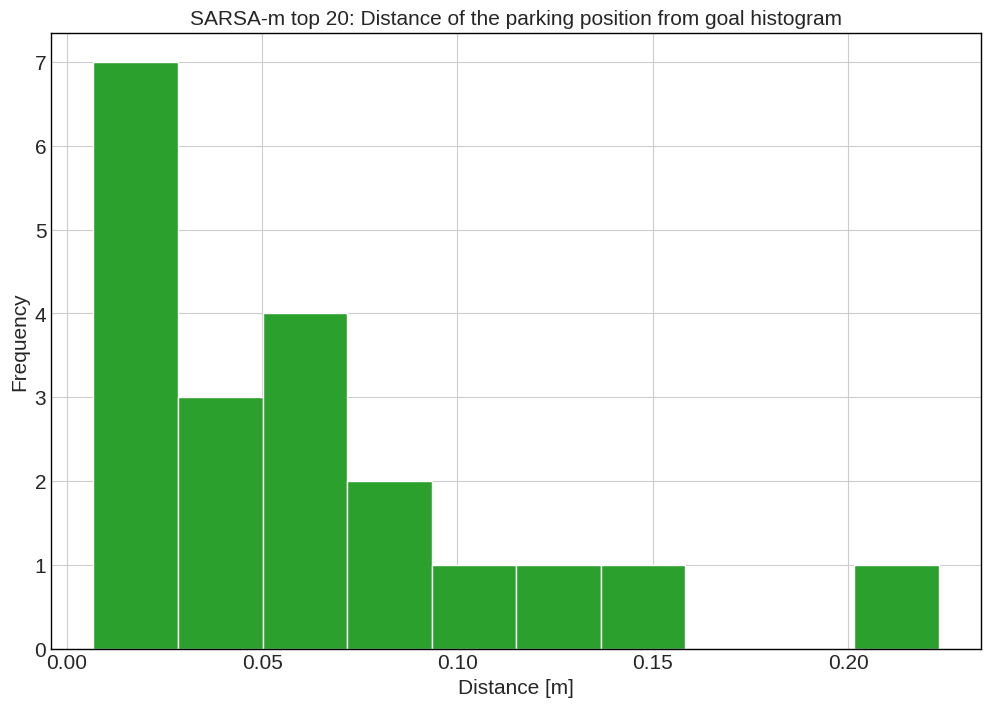

In [24]:
plot_distance_goal_hist(best_sarsa_df, "SARSA-m", color_selection["SARSA-m"][1], n_top=20)

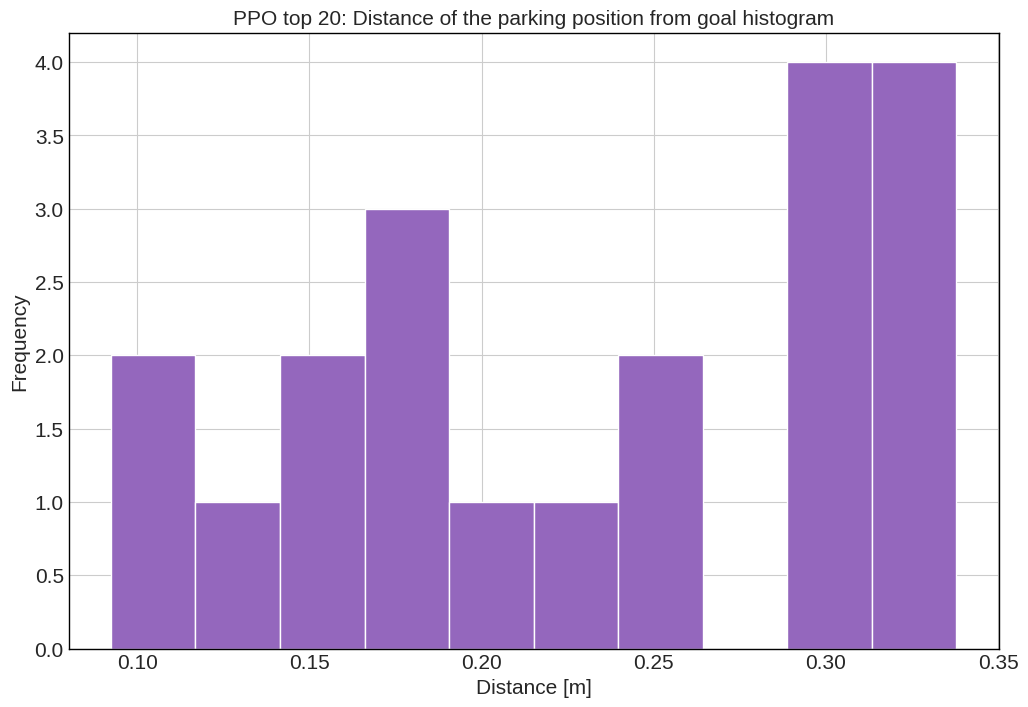

In [25]:
plot_distance_goal_hist(best_ppo_df, "PPO", color_selection["PPO"][1], n_top=20)

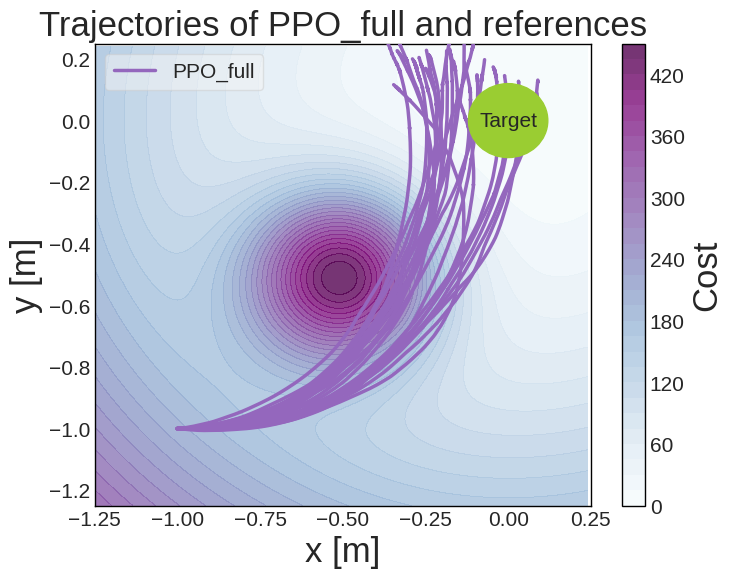

In [26]:
plot_chosen_best_checkpoint(best_ppo_df, 
                            "PPO_full", 
                            color_selection["PPO"][1], 
                            linestyle="solid",
                            target_r=0.12,
                            get_cost_map_func=get_cost_map)

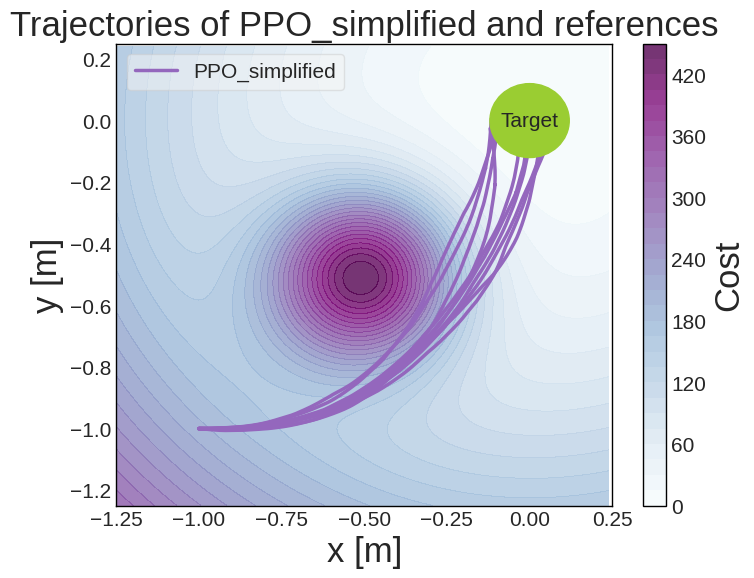

In [27]:
group_df = best_ppo_df.groupby(["absolute_path"]).agg({"goal_err": "min"})
top_10_abs_path = group_df.sort_values("goal_err").iloc[:10, :].index
tmp_df = best_ppo_df.set_index("absolute_path")

modified_dfs = []
for p in top_10_abs_path:
    iter_df = tmp_df.loc[p].reset_index()
    a = iter_df["goal_err"].argmin()
    iter_df = iter_df.truncate(after=iter_df["goal_err"].argmin())
    modified_dfs.append(iter_df.copy())

modified_dfs = pd.concat(modified_dfs)
plot_chosen_best_checkpoint(modified_dfs, "PPO_simplified", 
                            color_selection["PPO"][1], 
                            linestyle="solid", 
                            target_r=0.12,
                            get_cost_map_func=get_cost_map
                            # x_lim=[-1.7, 0.25],
                            # y_lim=[-1.25, 0.7],
                            )

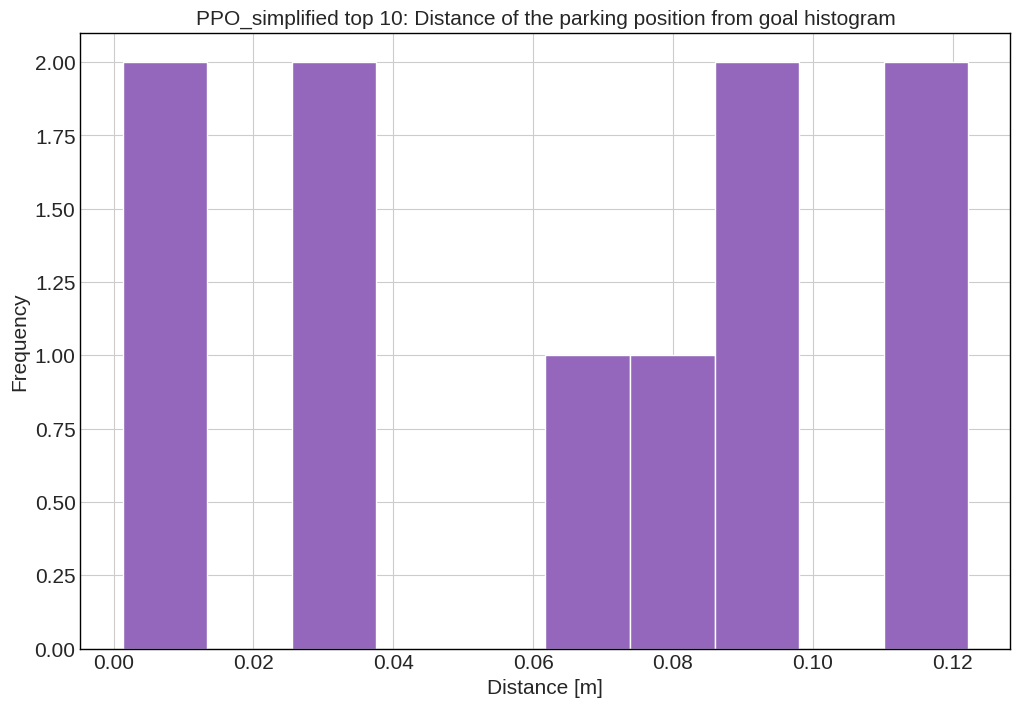

In [28]:
plot_distance_goal_hist(modified_dfs, "PPO_simplified", color_selection["PPO"][1], n_top=10)

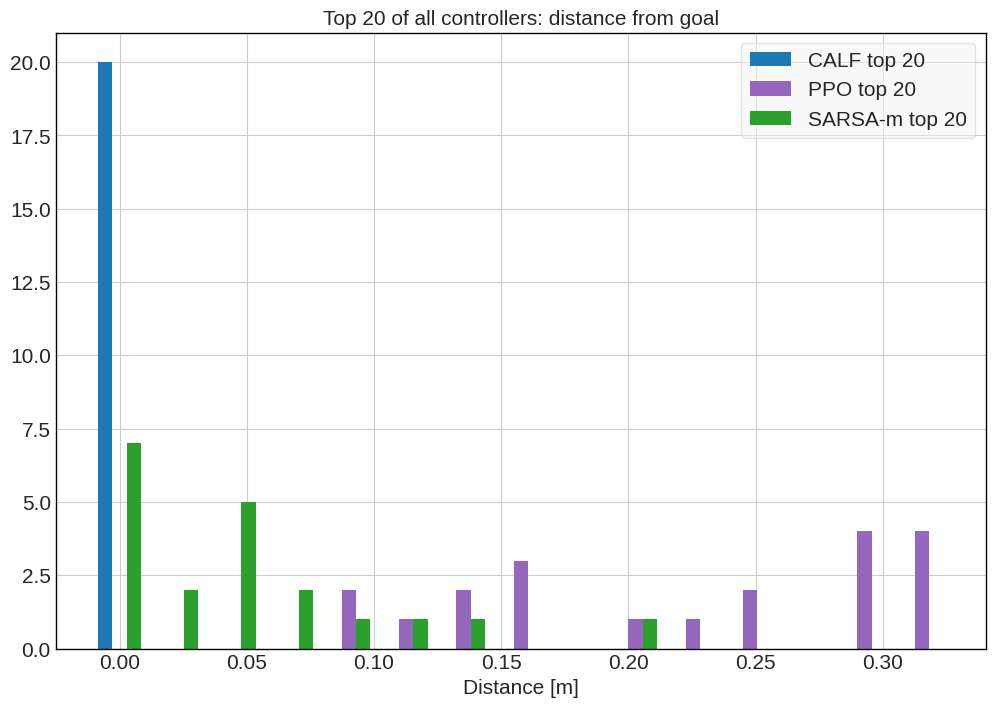

In [29]:
plot_distance_goal_comhist([best_calf_df, best_ppo_df, best_sarsa_df],
                           names=["CALF top 20", "PPO top 20", "SARSA-m top 20"],
                           colors=[color_selection["CALF"][1],
                                   color_selection["PPO"][1],
                                   color_selection["SARSA-m"][1]],
                           title="Top 20 of all controllers: distance from goal")

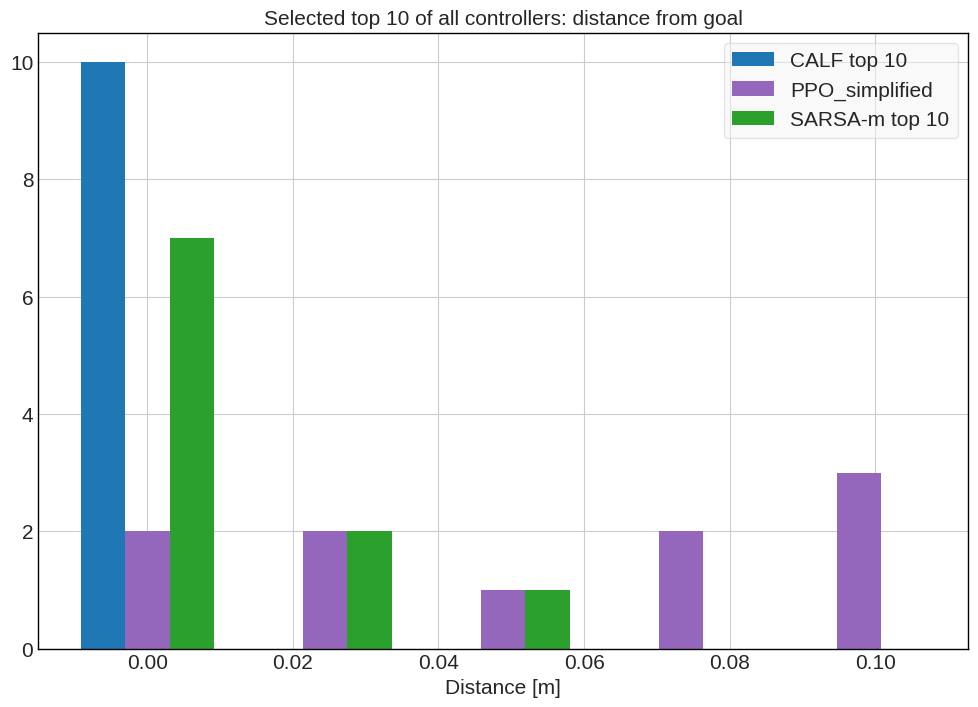

In [30]:

plot_distance_goal_comhist([best_calf_df, modified_dfs, best_sarsa_df],
                           names=["CALF top 10", "PPO_simplified", "SARSA-m top 10"],
                           colors=[color_selection["CALF"][1],
                                   color_selection["PPO"][1],
                                   color_selection["SARSA-m"][1]],
                           n_top=10,
                           title="Selected top 10 of all controllers: distance from goal")